In [4]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [5]:
# menyimpan dataset dalam variabel
iris = pd.read_csv('iris.csv')

# cetak dataset
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [6]:
# melihat info dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# cetak 10 baris dataset pertama
iris[0:10]

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


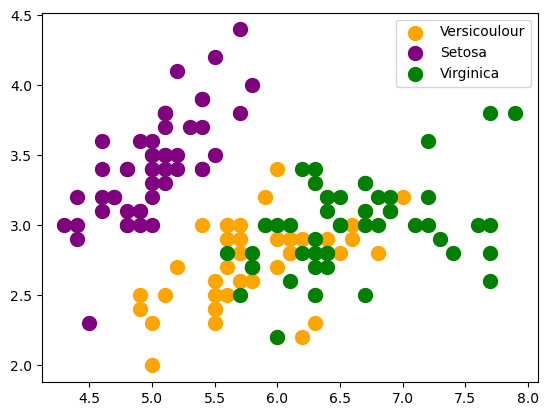

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

df_numeric = iris.drop('variety', axis=1)

encoder = OneHotEncoder()

categorical_data = iris[['variety']]
encoded_categorical = encoder.fit_transform(categorical_data).toarray()

encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(['variety']))

final_df = pd.concat([df_numeric, encoded_df], axis=1)

imputer = SimpleImputer(strategy='mean')
final_df_imputed = pd.DataFrame(imputer.fit_transform(final_df), columns=final_df.columns)

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(final_df_imputed)

plt.scatter(final_df_imputed.iloc[y_kmeans == 0, 0], final_df_imputed.iloc[y_kmeans == 0, 1], s=100, c='orange', label='Versicoulour')
plt.scatter(final_df_imputed.iloc[y_kmeans == 1, 0], final_df_imputed.iloc[y_kmeans == 1, 1], s=100, c='purple', label='Setosa')
plt.scatter(final_df_imputed.iloc[y_kmeans == 2, 0], final_df_imputed.iloc[y_kmeans == 2, 1], s=100, c='green', label='Virginica')

plt.legend()
plt.show()

In [24]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

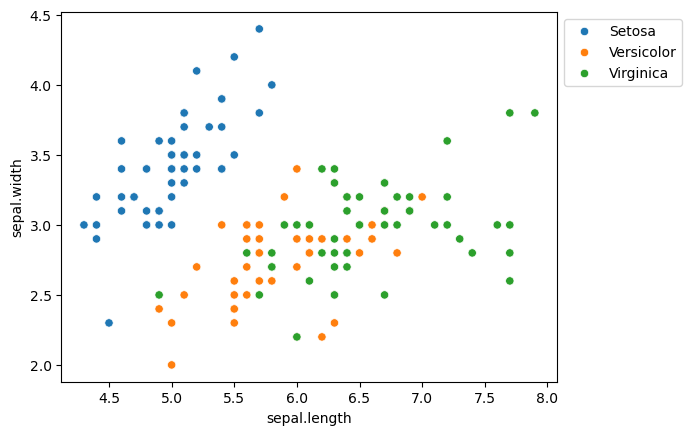

In [ ]:
sns.scatterplot(x='sepal.length', y='sepal.width',
                hue='variety', data=iris)

plt.legend(bbox_to_anchor=(1,1), loc=2) # penempatan legend di luar gambar
plt.show()

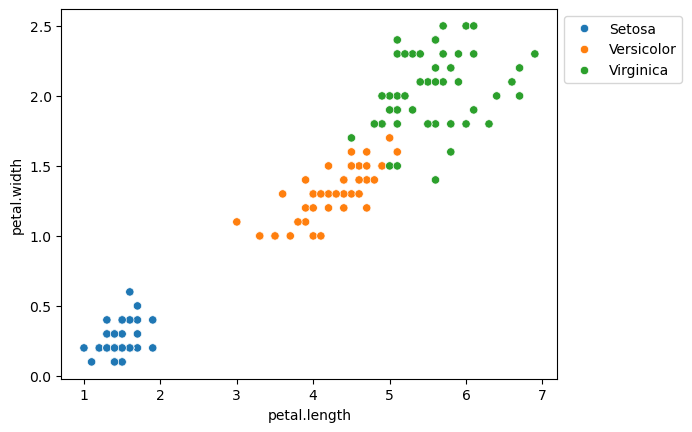

In [29]:
sns.scatterplot(x='petal.length', y='petal.width',
                hue='variety', data=iris)

plt.legend(bbox_to_anchor=(1,1), loc=2) # penempatan legend di luar gambar
plt.show()

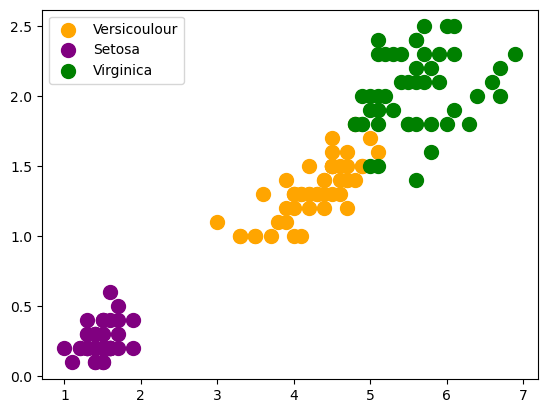

In [28]:
plt.scatter(final_df_imputed.iloc[y_kmeans == 0, 2], final_df_imputed.iloc[y_kmeans == 0, 3], s=100, c='orange', label='Versicoulour')
plt.scatter(final_df_imputed.iloc[y_kmeans == 1, 2], final_df_imputed.iloc[y_kmeans == 1, 3], s=100, c='purple', label='Setosa')
plt.scatter(final_df_imputed.iloc[y_kmeans == 2, 2], final_df_imputed.iloc[y_kmeans == 2, 3], s=100, c='green', label='Virginica')

plt.legend()
plt.show()